In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pysph.solver.utils import load, iter_output, get_files
import pandas as pd
import os

file_base = "E:\IIT Bombay - Miscellaneous\Winter Project\SLP-Smoothed-Particle-Hydrodynamics\SLP\dpsph\PySPH-Testing"


global savefig_additional 
global figTitle1
global figTitle2
global figTitle3

In [2]:
def extract_RT(file_loc):

    from os import walk
    files = []
    for (dirpath, dirnames, filenames) in walk(file_loc):
        files.extend(filenames)
        break

    fname = ''
    for i in files:
        if i.endswith('.log'):
            fname = i

    file_loc += '/' + fname
    data = open(file_loc, 'r')
    lines = data.read()
    rt = float(lines[lines.find('Run took: ')+10:].split(' secs')[0])
    data.close()

    return rt

def custom_plot1(sph_schm, sph_schm_legend, sz=(11,10), save=False, adjust_bot=0.2):
    sns.set_style("ticks", {'axes.facecolor': '#EAEAF2', 'axes.grid': True})
    n = len(sph_schm)
    fig, axs = plt.subplots(1, 1, figsize=sz)

    cnt, RT = 0, []
    for schm in sph_schm:        
        file_loc = os.path.join(file_base, 'Outputs', schm, 'results.npz')
        data = np.load(file_loc) # Read data
        leg = sph_schm_legend[schm]
        

        t, r_err = data['t'], data['r_err']
        
        axs.loglog(t, r_err, linewidth=2, label=leg)
        #axs.plot(t, r_err, linewidth=2, label=leg)

        file_loc = os.path.join(file_base, 'Outputs', schm)
        RT.append(extract_RT(file_loc))


    # Labels
    axs.set_ylabel(r'Error in radius $\rightarrow$', fontsize='large')
    axs.set_xlabel(r't $\rightarrow$', fontsize='large')

    # Titles
    fig.suptitle(figTitle1, fontsize=22)
    axs.set_title('Error in Radius vs Time', fontsize='large')

    fig.tight_layout()
    fig.subplots_adjust(bottom=adjust_bot)
    lines = []
    labels = []
    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    n += 1
    lines, labels = lines[0:n], labels[0:n]

    # Add Runtime scale
    RT = np.array(RT)
    RT_new = 100 * (RT - np.ones_like(RT)*np.min(RT)) / (np.ones_like(RT)*np.min(RT))

    for i in range(n-1):
        temp = RT_new[i]
        if temp == 0.0:
            rt = ' {' + str(round(RT[i], 1)) + 's}'
        else:
            rt = r' {' + str(round(temp, 2)) + r'$\% \uparrow$}'
        labels[i] = labels[i] + rt

    fig.legend(lines, labels, loc = 'lower center', ncol=n, prop={'size': 'large'}, title=r'Legend {$\Delta \%$ Runtime}')

    if save == True:
        tle = os.path.join(file_base, 'Error_radius'+ savefig_additional + '.png')
        fig.savefig(tle, dpi=400)

def custom_plot2(sph_schm_legend, sz=(11,10), save=False, adjust_bot=0.2):
    sph_schm = list(sph_schm_legend.keys())
    sns.set_style("ticks", {'axes.facecolor': '#EAEAF2', 'axes.grid': True})
    n = len(sph_schm)
    fig, axs = plt.subplots(1, 1, figsize=sz)

    cnt, RT, pts = 0, [], []
    for schm in sph_schm:        
        file_loc = os.path.join(file_base, 'Outputs', schm, 'results.npz')
        data = np.load(file_loc) # Read data
        leg = sph_schm_legend[schm]
        

        t, r_err = data['t'], data['r_err']
        dt = t[1]-t[0]
        r_err = np.average(r_err)

        pts.append([dt, r_err])
        
        axs.loglog(dt, r_err, 'o')

        file_loc = os.path.join(file_base, 'Outputs', schm)
        RT.append(extract_RT(file_loc)) 

    eul_pts, rk4_pts = np.array(pts[0:n//2]), np.array(pts[n//2:])
    axs.loglog(eul_pts[:, 0], eul_pts[:,1], '--', label='Euler')
    axs.loglog(rk4_pts[:, 0], rk4_pts[:,1], '--', label='RK4')


    # Labels
    axs.set_ylabel(r'Error in radius $\rightarrow$', fontsize='large')
    axs.set_xlabel(r'$\Delta t \rightarrow$', fontsize='large')

    # Titles
    fig.suptitle(figTitle1, fontsize=22)
    axs.set_title('Error in Radius vs Time', fontsize='large')

    fig.tight_layout()
    fig.subplots_adjust(bottom=adjust_bot)

    fig.legend(loc='lower center', ncol=4)

    if save == True:
        tle = os.path.join(file_base, 'Error_radius_conv'+ savefig_additional + '.png')
        fig.savefig(tle, dpi=400)

In [3]:
sph_schm_legend = {
    '00': 'eul, e0',
    '01': 'eul, e1',
    '02': 'eul, e2',
    '03': 'eul, e3',
    '04': 'eul, e4',


    '10': 'rk4, e0',
    '11': 'rk4, e1',
    '12': 'rk4, e2',
    '13': 'rk4, e3',
    '14': 'rk4, e4',
}

save_bool = False

#sph_schm, name, ext = ['01', '02', '03', '04'], 'Euler Integrator', 'eul'
#sph_schm, name, ext = ['11', '12', '13', '14'], 'RK-4 Integrator', 'rk4'
sph_schm, name, ext = ['01', '11', '04', '14'], 'Both', 'both'
#sph_schm, name, ext = ['01', '11', '04', '14'], 'Convergence Order',


##############
savefig_additional = '_' + ext
figTitle1 = name
##############

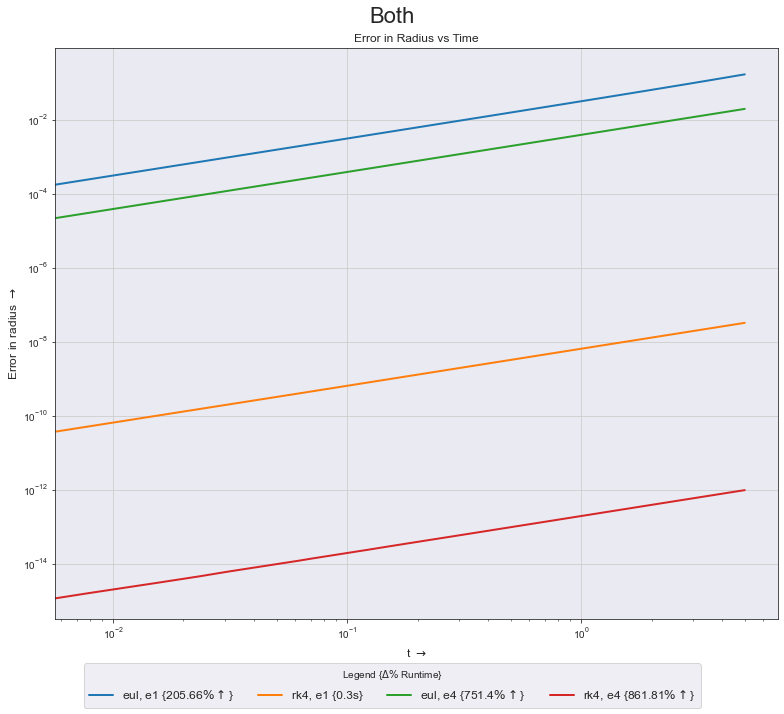

In [4]:
custom_plot1(sph_schm, sph_schm_legend, save=save_bool, adjust_bot=0.13)

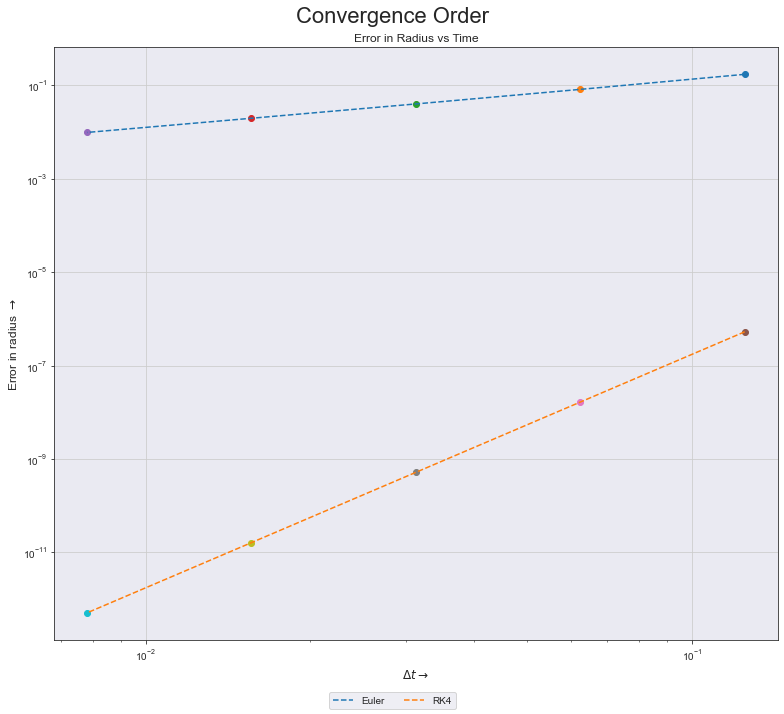

In [5]:
figTitle1, savefig_additional = 'Convergence Order', ''
custom_plot2(sph_schm_legend, save=save_bool, adjust_bot=0.1)